# 25 marks

In [32]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, zscore
from sklearn.datasets import fetch_california_housing
import pymc3 as pm
import arviz as az
from model_utils import preprocess_housing

In [52]:
# Load California housing dataset

california_housing = fetch_california_housing(as_frame=True)
x = california_housing.data
print(x.shape)
y = california_housing.target
print(y.shape)

(20640, 8)
(20640,)


In [56]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
# Preprocess datapoints

X_train, X_test, y_train, y_test = preprocess_housing(x,y)

data has no null values
Removed 846 outlier rows
Target value counts: 5.00001    965
Name: MedHouseVal, dtype: int64
Removed 670 skewed rows


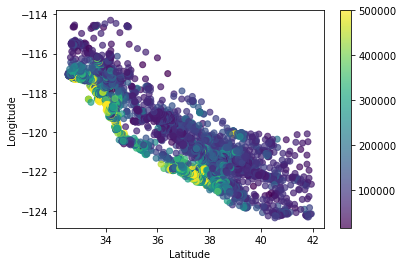

In [4]:
# Plot how longitude and latitude affect median house price

latitudes = x['Latitude']
longitudes = x['Longitude']
plt.scatter(latitudes, longitudes, c=y*100000, alpha=0.7)
plt.colorbar()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
num_samples = 1000
model = pm.Model()

with model:
    # Defining our priors
    w0 = pm.Normal('w0', mu=0, sigma=5)
    w1 = pm.Normal('w1', mu=0, sigma=5)
    w2 = pm.Normal('w2', mu=0, sigma=5)
    w3 = pm.Normal('w3', mu=0, sigma=5)
    w4 = pm.Normal('w4', mu=0, sigma=5)
    w5 = pm.Normal('w5', mu=0, sigma=5)
    w6 = pm.Normal('w6', mu=0, sigma=5)
    w7 = pm.Normal('w7', mu=0, sigma=5)
    w8 = pm.Normal('w8', mu=0, sigma=5)
    sigma = pm.Uniform('sigma', lower=0, upper=20)

    y_est = w0 + w1*x.loc[:,"MedInc"] + w2*x.loc[:,"HouseAge"] + w3*x.loc[:,"AveRooms"] + w4*x.loc[:,"AveBedrms"] + w5*x.loc[:,"Population"] + w6*x.loc[:,"AveOccup"] + w7*x.loc[:,"Latitude"] + w8*x.loc[:,"Longitude"]

    likelihood = pm.Normal('y', mu=y_est, sigma=sigma, observed=y)
    
    sampler = pm.NUTS()
    # sampler = pm.Metropolis()
    
    idata = pm.sample(num_samples, sampler, progressbar=True, cores=4, chains=2)

/var/folders/8g/b7_xy_gx7ysgvrt10qyzhv7c0000gn/T/ipykernel_41485/1119297853.py:24: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  idata = pm.sample(num_samples, sampler, progressbar=True, cores=4, chains=2)
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma, w8, w7, w6, w5, w4, w3, w2, w1, w0]


/Users/lucy/opt/anaconda3/envs/ML_labs/lib/python3.10/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/lucy/opt/anaconda3/envs/ML_labs/lib/python3.10/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'w0'}>,
        <AxesSubplot:title={'center':'w0'}>],
       [<AxesSubplot:title={'center':'w1'}>,
        <AxesSubplot:title={'center':'w1'}>],
       [<AxesSubplot:title={'center':'w2'}>,
        <AxesSubplot:title={'center':'w2'}>],
       [<AxesSubplot:title={'center':'w3'}>,
        <AxesSubplot:title={'center':'w3'}>],
       [<AxesSubplot:title={'center':'w4'}>,
        <AxesSubplot:title={'center':'w4'}>],
       [<AxesSubplot:title={'center':'w5'}>,
        <AxesSubplot:title={'center':'w5'}>],
       [<AxesSubplot:title={'center':'w6'}>,
        <AxesSubplot:title={'center':'w6'}>],
       [<AxesSubplot:title={'center':'w7'}>,
        <AxesSubplot:title={'center':'w7'}>],
       [<AxesSubplot:title={'center':'w8'}>,
        <AxesSubplot:title={'center':'w8'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

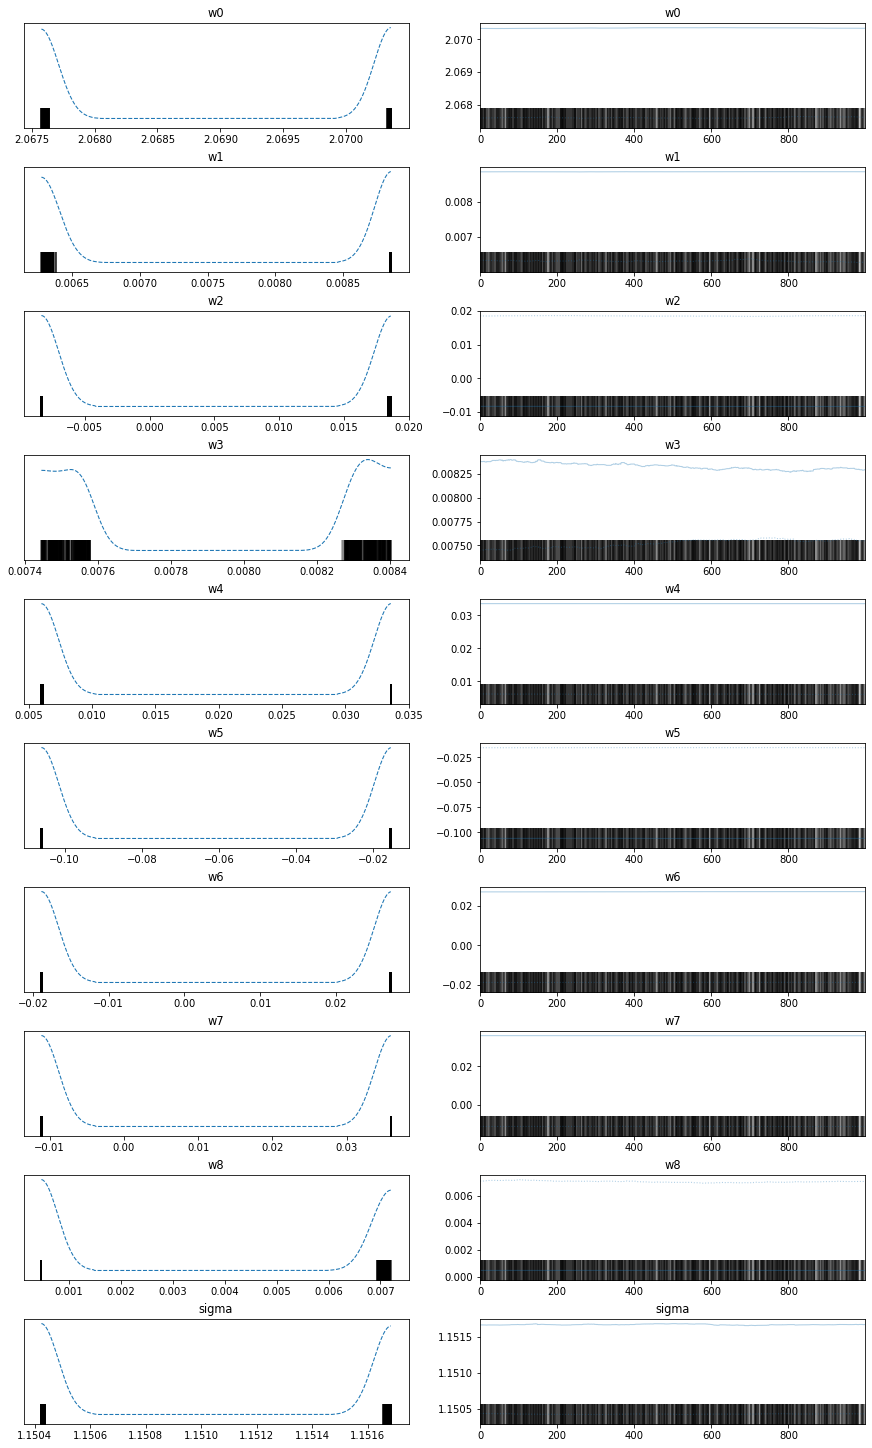

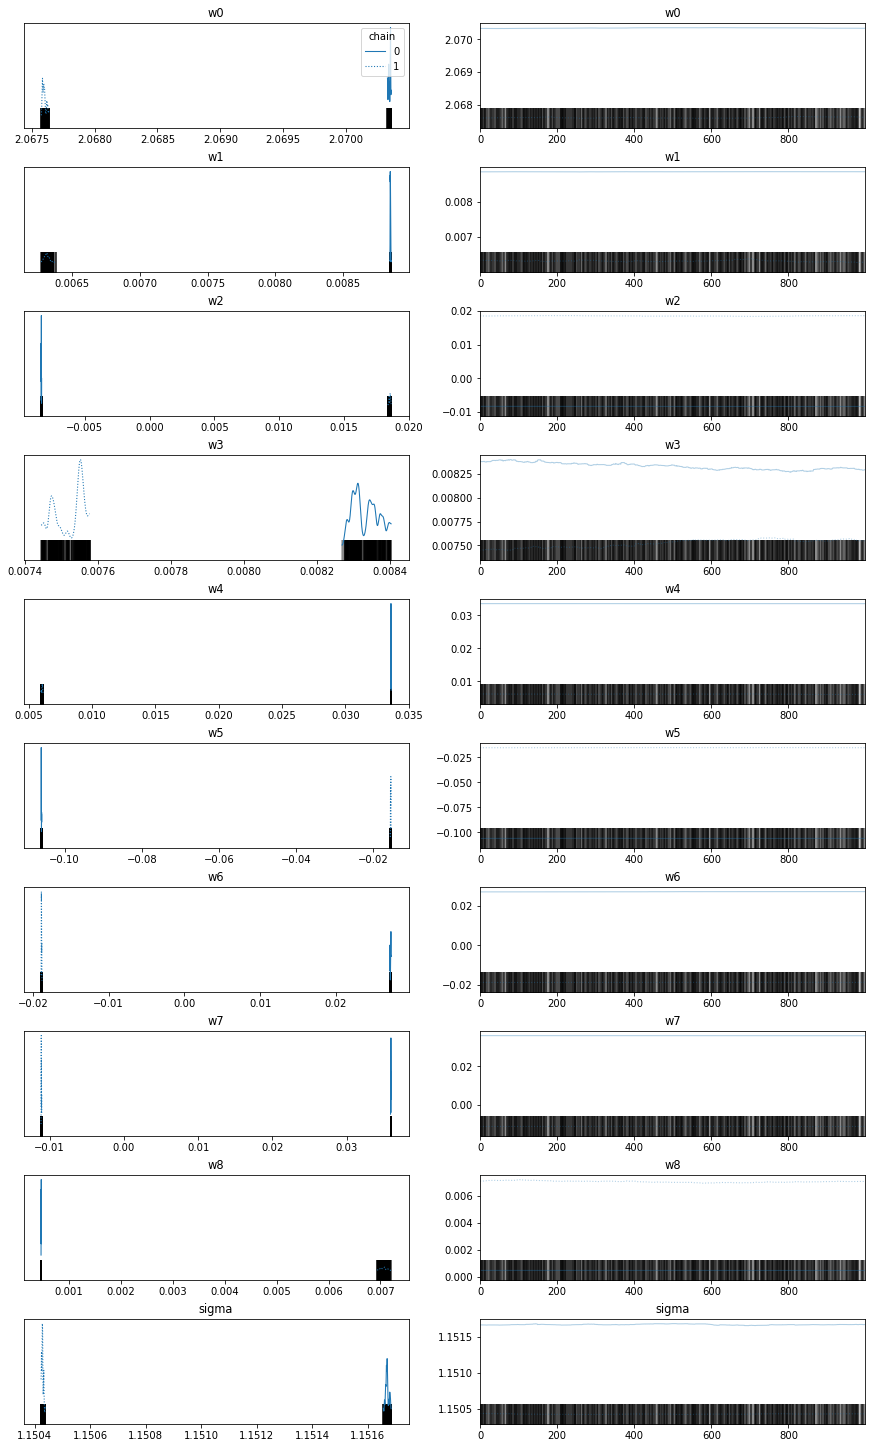

In [29]:
az.plot_trace(idata, combined=True)
az.plot_trace(idata,legend=True)

In [30]:
az.summary(idata, round_to=2)

/Users/lucy/opt/anaconda3/envs/ML_labs/lib/python3.10/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w0,2.07,0.00,2.07,2.07,0.00,0.00,2.75,13.71,2.00
w1,0.01,0.00,0.01,0.01,0.00,0.00,2.69,16.23,2.07
w2,0.01,0.01,-0.01,0.02,0.01,0.01,2.63,21.33,2.14
w3,0.01,0.00,0.01,0.01,0.00,0.00,2.27,10.83,3.03
w4,0.02,0.01,0.01,0.03,0.01,0.01,2.84,12.04,1.96
w5,-0.06,0.05,-0.11,-0.02,0.03,0.03,2.60,20.61,2.16
w6,0.00,0.02,-0.02,0.03,0.02,0.01,2.35,11.33,2.80
w7,0.01,0.02,-0.01,0.04,0.02,0.01,2.98,41.96,1.83
w8,0.00,0.00,0.00,0.01,0.00,0.00,2.37,12.12,2.64
sigma,1.15,0.00,1.15,1.15,0.00,0.00,2.95,30.22,1.86
